# MScFE 652: Portfolio Management - GWP 3 (Group 4272)

Members:
1. Patapongrat Lertbuaban
2. Shivani Verma
3. Chinmay Hegde

# Introduction

After introduction of Machine Learning, the computers have capability to learn from iterations and logics incorporated in algorithm. Machine learning introduced Deep learning, Artificial intelligence, Reinforcement learning.

In Finance field, machine learning helped to develope different types of models like autoencoders, k-means clustering algotrithms and so on. Creating and incorporating different adjustements to copy the real life market experience gives us the more reliable and less risky portfolios to encorporate.

In this assignment, we are going to look through some of the different examples of portfolio management with the help of different machine learing algorithms.

# Step 1

### - Improvements using denoising -> Autoencoders

Denoising autoencoders are a type of neural network that we can use to learn a representation (encoding) of data in an unsupervised manner. They are trained to reconstruct a clean version of an input signal corrupted by noise.

Features - An autoencoder consists of two parts:
- Encoder
- Decoder

The encoder maps the input data to a lower-dimensional representation or encoding, and the decoder maps the encoding back to the original data space. During training, the autoencoder is given a set of clean input examples and the corresponding noisy versions of these examples. The goal is to learn a function that maps the noisy input to the clean output using the encoder-decoder architecture.

Benefits -

i. DAEs can impute missing values in a dataset by learning to reconstruct the missing values from the remaining data.

ii. DAEs can identify anomalies in a dataset by learning to reconstruct normal data and then flagging difficult inputs as potentially abnormal.

iii. DAEs can be used to identify fraudulent transactions by learning to reconstruct normal transactions from noisy versions.


### - Improvements using clustering -> K-means Clustering

K-Means Clustering is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters.

Features - 
k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances.

Benefits -
\
i. Increased performance: Multiple machines provide greater processing power. 

ii. Greater scalability: As your user base grows and report complexity increases, your resources can grow. 

iii. Simplified management: Clustering simplifies the management of large or rapidly growing systems. 


### - Improvements using backtesting -> Combinatorial Purged Cross-Validation
Combinatorial Purged Cross-Validation provides the exact number of combinations of training/testing sets required to construct a set of backtesting paths while purging training observations that contain leaked information, given a set of backtest paths targeted by the Portfolio manager.

Features -
Total amount of testing groups is k * N_splits
, Total number of path is k/N(N, N-k)

Benefits -


i. Sharpe ratio can be estimated on every trial.

ii. It exhibits lower variance.


# Step 2: Single Improvement Techniques

In this section, we will study how the improvement techniques, i.e., Autoencoders and Combinatorial Purged Cross-Validation can enhance the portfolio's performance.

## Original Strategy (Best Portfolio from GWP2)

The best portfolio from GWP2 is shown below. Firstly, the necessary libraries are imported.

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
seed_value = 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

The best portfolio includes five stocks including AAPL, MSFT, AMZN, GOOGL, and TSLA. The training period is between 2023/1/1 and 2023/7/1.

In [ ]:
# Define tickers and time period for the historical data
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']
start_date = '2023-01-01'
end_date = '2023-07-01'

In [ ]:
# Download historical stock data
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Calculate daily log returns
returns = np.log(data).diff().dropna()

# Define the annual risk-free rate and convert to a daily rate
annual_risk_free_rate = 0.04
daily_risk_free_rate = (1 + annual_risk_free_rate)**(1/252) - 1

[*********************100%%**********************]  5 of 5 completed


Then, the portfolio weights are calculated by using Kelly criterion. The imprementation and results are shown below.

Kelly Fractions:
AAPL     20.411807
AMZN      6.511495
GOOGL     5.118787
MSFT      8.593043
TSLA      5.603069
dtype: float64

Portfolio Weights:
AAPL     0.441449
AMZN     0.140825
GOOGL    0.110705
MSFT     0.185843
TSLA     0.121178
dtype: float64


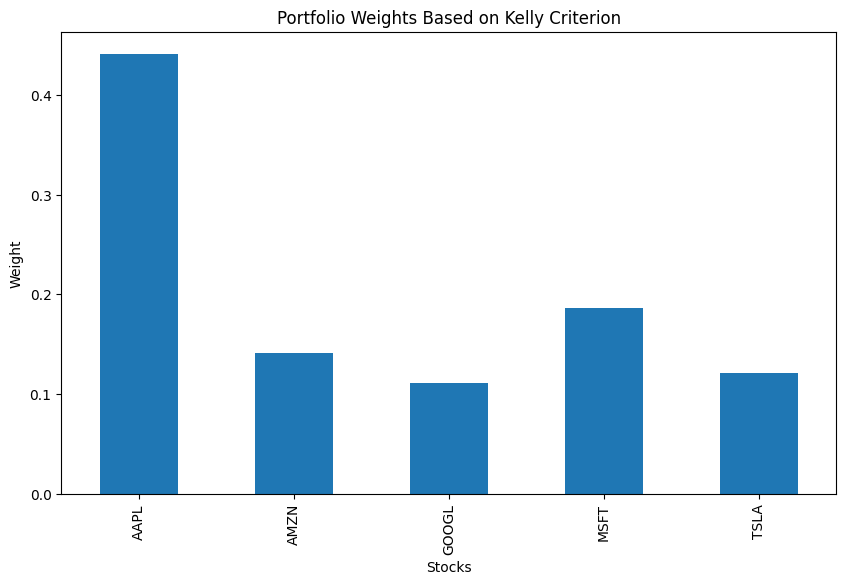

In [ ]:
# Function to calculate Kelly Criterion for continuous outcomes
def kelly_criterion_continuous(returns, risk_free_rate):
    mean_return = returns.mean()
    variance_return = returns.var()
    kelly_fraction = max((mean_return - risk_free_rate) / variance_return, 0) # No negative Kelly fractions
    return kelly_fraction

# Calculate the Kelly fraction for each stock
kelly_fractions = returns.apply(kelly_criterion_continuous, risk_free_rate=daily_risk_free_rate)

# Normalize the Kelly fractions to get portfolio weights
portfolio_weights = kelly_fractions / kelly_fractions.sum()

# Display Kelly fractions and portfolio weights
print("Kelly Fractions:")
print(kelly_fractions)
print("\nPortfolio Weights:")
print(portfolio_weights)

# Plot the portfolio weights
portfolio_weights.plot(kind='bar', figsize=(10, 6))
plt.title('Portfolio Weights Based on Kelly Criterion')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.show()

The performance of the Kelly portfolio during the training period is shown below.

[*********************100%%**********************]  5 of 5 completed


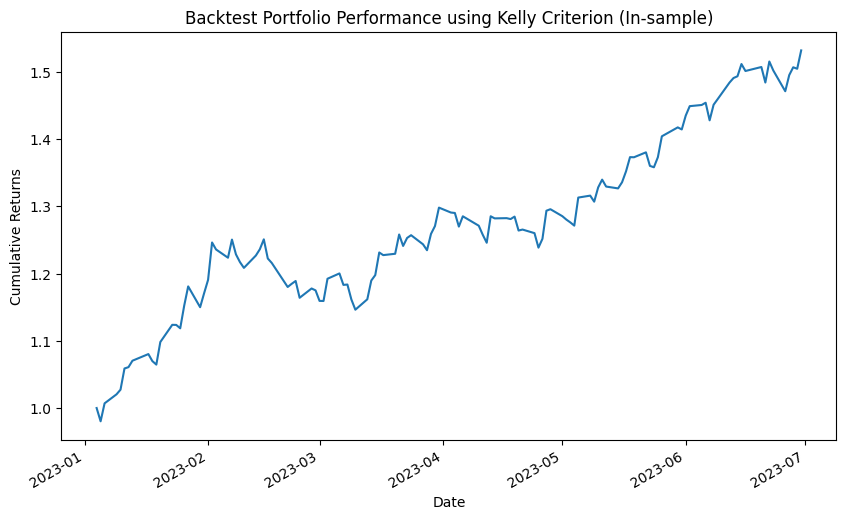

In [ ]:
# Training period
start_date_backtest = '2023-01-01'
end_date_backtest = '2023-07-01'

# Download data for the backtest period
data_backtest = yf.download(tickers, start=start_date_backtest, end=end_date_backtest, interval='1d')['Adj Close']

# Calculate daily log returns for the backtest period
returns_backtest = np.log(data_backtest).diff().dropna()

# Calculate portfolio performance
daily_portfolio_returns = (returns_backtest * portfolio_weights).sum(axis=1)
# Adjust daily returns by subtracting the daily risk-free rate
adjusted_daily_returns = daily_portfolio_returns - daily_risk_free_rate
cumulative_returns = (1 + adjusted_daily_returns).cumprod()

# Plot the cumulative returns
cumulative_returns.plot(figsize=(10, 6))
plt.title('Backtest Portfolio Performance using Kelly Criterion (In-sample)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

The performance statistics are shown below.

In [ ]:
# Output the performance statistics
print(f"Cumulative Return: {cumulative_returns.iloc[-1] - 1:.2%}")
print(f"Mean Daily Return: {adjusted_daily_returns.mean():.4%}")
print(f"Volatility (Standard Deviation of Cumulative Returns): {cumulative_returns.std():.4%}")
print(f"Volatility (Standard Deviation of Daily Returns): {adjusted_daily_returns.std():.4%}")
print(f"Sharpe Ratio: {(cumulative_returns.iloc[-1]-1)/(cumulative_returns.std()):.4}")

Cumulative Return: 53.25%
Mean Daily Return: 0.3584%
Volatility (Standard Deviation of Cumulative Returns): 12.9647%
Volatility (Standard Deviation of Daily Returns): 1.4717%
Sharpe Ratio: 4.107


## Improvements using Denoising Technique

In this section, the denoising technique will be used to improve the performance of the portfolio. We will use autoencoders to perform denoising for our Kelly portfolio. The implementation and results are shown below.

[*********************100%%**********************]  5 of 5 completed
4/4 [==============================] - 1s 12ms/step
Kelly Fractions (Denoised):
AAPL     16.032944
MSFT     10.327532
AMZN      2.062388
GOOGL    32.423293
TSLA     27.105367
dtype: float64

Portfolio Weights (Denoised):
AAPL     0.182293
MSFT     0.117423
AMZN     0.023449
GOOGL    0.368650
TSLA     0.308185
dtype: float64


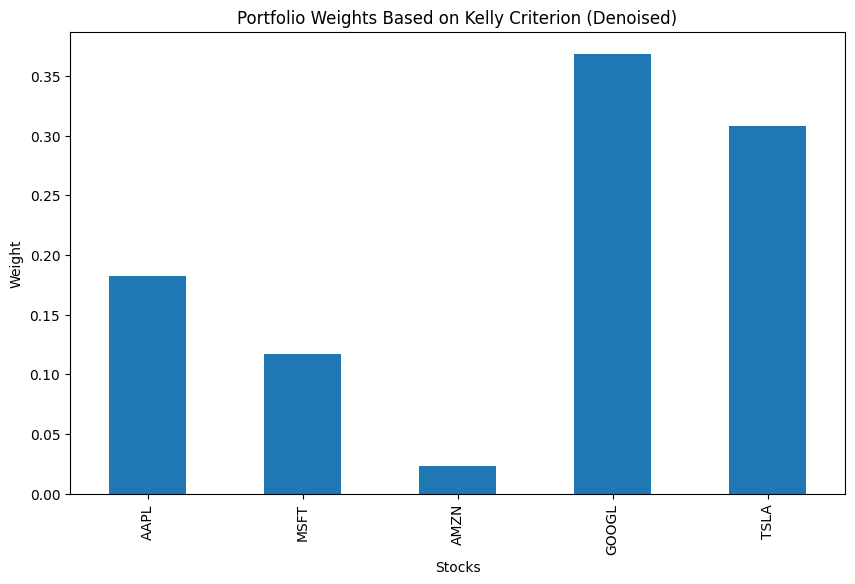

[*********************100%%**********************]  5 of 5 completed


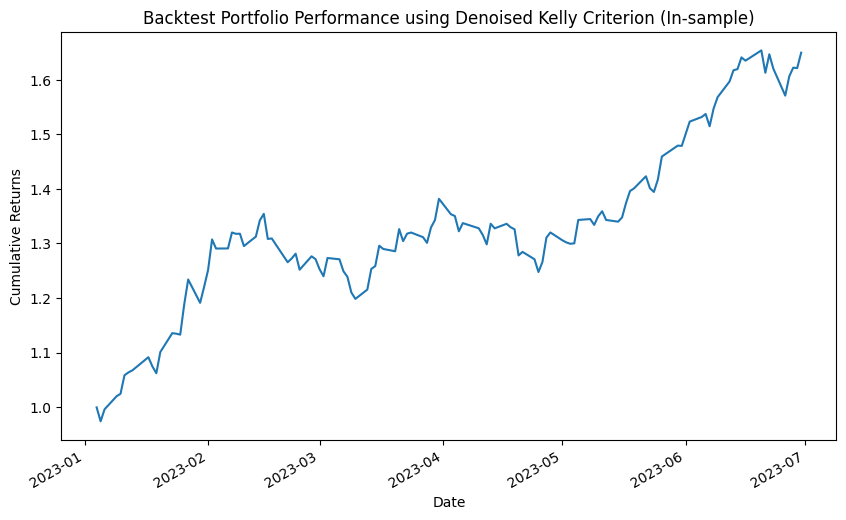


Cumulative Return (Denoised): 64.99%
Mean Daily Return (Denoised): 0.4238%
Volatility (Standard Deviation of Cumulative Returns) (Denoised): 15.4967%
Volatility (Standard Deviation of Daily Returns) (Denoised): 1.7885%
Sharpe Ratio (Denoised): 4.194


In [ ]:
# Define tickers and time period for the historical data
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']
start_date = '2023-01-01'
end_date = '2023-07-01'

# Download historical stock data
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']
returns = np.log(data).diff().dropna()

# Function to add noise to the data
def add_noise(data, noise_factor=0.01):
    return data + np.random.normal(loc=0, scale=noise_factor, size=data.shape)

# Function to build and train the autoencoder
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='linear')(encoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder

# Function to denoise the data
def denoise_data(data, autoencoder):
    return autoencoder.predict(data)

# Add noise to the returns
noisy_returns = add_noise(returns)

# Standardize the data
scaler = StandardScaler()
noisy_returns_scaled = scaler.fit_transform(noisy_returns)
train_data, test_data, train_returns, test_returns = train_test_split(
    noisy_returns_scaled, returns.values, test_size=0.2, random_state=seed_value
)

# Build and train the autoencoder
autoencoder = build_autoencoder(train_data.shape[1])
autoencoder.fit(train_data, train_data, epochs=50, batch_size=256, shuffle=True,
                validation_data=(test_data, test_data), verbose=0)

# Denoise the returns
denoised_returns = denoise_data(noisy_returns_scaled, autoencoder)

# Convert denoised returns back
denoised_returns_original_scale = scaler.inverse_transform(denoised_returns)

# Define the risk-free rate
annual_risk_free_rate = 0.04
daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1 / 252) - 1

# Function to calculate Kelly Criterion for continuous outcomes
def kelly_criterion_continuous(returns, risk_free_rate):
    mean_return = returns.mean()
    variance_return = returns.var()
    kelly_fraction = max((mean_return - risk_free_rate) / variance_return, 0)  # No negative Kelly fractions
    return kelly_fraction

# Calculate the Kelly fraction for each stock using denoised returns
kelly_fractions_denoised = pd.Series([kelly_criterion_continuous(denoised_returns_original_scale[:, i], daily_risk_free_rate) for i in range(len(tickers))], index=tickers)

# Normalize the Kelly fractions to get portfolio weights
portfolio_weights_denoised = kelly_fractions_denoised / kelly_fractions_denoised.sum()

# Display Kelly fractions and portfolio weights
print("Kelly Fractions (Denoised):")
print(kelly_fractions_denoised)
print("\nPortfolio Weights (Denoised):")
print(portfolio_weights_denoised)

# Plot the portfolio weights
portfolio_weights_denoised.plot(kind='bar', figsize=(10, 6))
plt.title('Portfolio Weights Based on Kelly Criterion (Denoised)')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.show()

# Backtest period
start_date_backtest = '2023-01-01'
end_date_backtest = '2023-07-01'

# Download data for the backtest period
data_backtest = yf.download(tickers, start=start_date_backtest, end=end_date_backtest, interval='1d')['Adj Close']

# Calculate daily log returns for the backtest period
returns_backtest = np.log(data_backtest).diff().dropna()

# Calculate portfolio performance using denoised returns
daily_portfolio_returns_denoised = (returns_backtest.values * portfolio_weights_denoised.values).sum(axis=1)
# Adjust daily returns by subtracting the daily risk-free rate
adjusted_daily_returns_denoised = daily_portfolio_returns_denoised - daily_risk_free_rate
cumulative_returns_denoised = (1 + adjusted_daily_returns_denoised).cumprod()

# Convert cumulative returns to a Pandas Series
cumulative_returns_denoised = pd.Series(cumulative_returns_denoised, index=returns_backtest.index)

# Plot the cumulative returns
cumulative_returns_denoised.plot(figsize=(10, 6))
plt.title('Backtest Portfolio Performance using Denoised Kelly Criterion (In-sample)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Output the performance statistics
print(f"\nCumulative Return (Denoised): {cumulative_returns_denoised.iloc[-1] - 1:.2%}")
print(f"Mean Daily Return (Denoised): {adjusted_daily_returns_denoised.mean():.4%}")
print(f"Volatility (Standard Deviation of Cumulative Returns) (Denoised): {cumulative_returns_denoised.std():.4%}")
print(f"Volatility (Standard Deviation of Daily Returns) (Denoised): {adjusted_daily_returns_denoised.std():.4%}")
print(f"Sharpe Ratio (Denoised): {(cumulative_returns_denoised.iloc[-1]-1)/(cumulative_returns_denoised.std()):.4}")

From the results, we can observe the return of the portfolio has significantly been decreased compared to the original Kelly portfolio throughout the training period. However, the Sharpe ratio does not change much since portfolio's volatility has also been increased.

## Improvements using Backtesting Technique

In this section, we will use backtesting technique to improve the performance of the portfolio. We will use Combinatorial Purged Cross-Validation technique in finding the portfolio weights. The implementation and results are shown below.

[*********************100%%**********************]  5 of 5 completed

Average Optimal Weights:
AAPL     0.494183
AMZN     0.104675
GOOGL    0.102440
MSFT     0.152163
TSLA     0.146539
dtype: float64


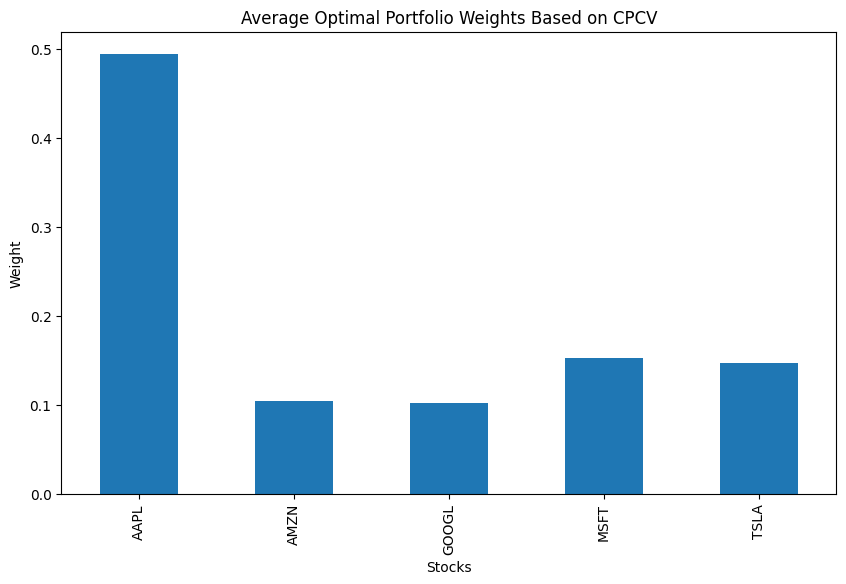

[*********************100%%**********************]  5 of 5 completed


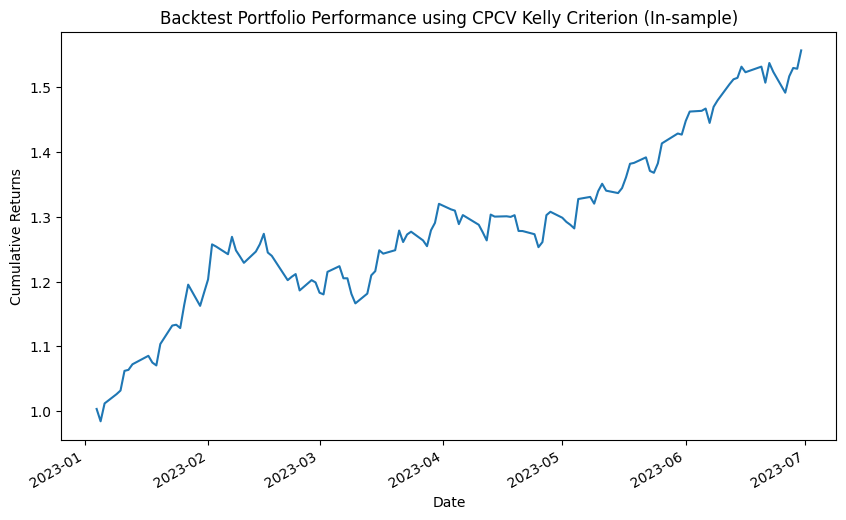


Cumulative Return (CPCV): 55.73%
Mean Daily Return (CPCV): 0.3715%
Volatility (Standard Deviation of Cumulative Returns) (CPCV): 13.1911%
Volatility (Standard Deviation of Daily Returns) (CPCV): 1.4691%
Sharpe Ratio (CPCV): 4.225


In [ ]:
# Define tickers and time period for the historical data
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']
start_date = '2023-01-01'
end_date = '2023-07-01'
np.random.seed(seed_value)

# Download historical stock data
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Calculate daily log returns
returns = np.log(data).diff().dropna()

# Define the annual risk-free rate and convert to a daily rate
annual_risk_free_rate = 0.04
daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1 / 252) - 1

# Function to calculate Kelly Criterion for continuous outcomes
def kelly_criterion_continuous(returns, risk_free_rate):
    mean_return = returns.mean()
    variance_return = returns.var()
    kelly_fraction = max((mean_return - risk_free_rate) / variance_return, 0)  # No negative Kelly fractions
    return kelly_fraction

# Function to perform Combinatorial Purged Cross-Validation
def combinatorial_purged_cross_validation(returns, num_splits):
    tscv = TimeSeriesSplit(n_splits=num_splits)

    optimal_weights_list = []

    for train_index, test_index in tscv.split(returns.index):
        train_returns = returns.iloc[train_index]
        test_returns = returns.iloc[test_index]

        # Calculate the Kelly fraction for each stock in the training set
        kelly_fractions = train_returns.apply(kelly_criterion_continuous, risk_free_rate=daily_risk_free_rate)

        # Normalize the Kelly fractions to get portfolio weights
        portfolio_weights = kelly_fractions / kelly_fractions.sum()

        # Save optimal weights for each fold
        optimal_weights_list.append(portfolio_weights)

    return optimal_weights_list

# Perform Combinatorial Purged Cross-Validation
num_splits = 5  # Number of splits for TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=num_splits)
optimal_weights_list = combinatorial_purged_cross_validation(returns, num_splits)

# Average optimal weights over all folds
average_optimal_weights = pd.DataFrame(optimal_weights_list).mean()

# Display the average optimal weights
print("\nAverage Optimal Weights:")
print(average_optimal_weights)

# Plot the average optimal weights
average_optimal_weights.plot(kind='bar', figsize=(10, 6))
plt.title('Average Optimal Portfolio Weights Based on CPCV')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.show()


# Backtest period
start_date_backtest = '2023-01-01'
end_date_backtest = '2023-07-01'

# Download data for the backtest period
data_backtest = yf.download(tickers, start=start_date_backtest, end=end_date_backtest, interval='1d')['Adj Close']

# Calculate daily log returns for the backtest period
returns_backtest = np.log(data_backtest).diff().dropna()

# Calculate portfolio performance using denoised returns
daily_portfolio_returns_cpcv = (returns_backtest.values * average_optimal_weights.values).sum(axis=1)
# Adjust daily returns by subtracting the daily risk-free rate
adjusted_daily_returns_cpcv = daily_portfolio_returns_cpcv - daily_risk_free_rate
cumulative_returns_cpcv = (1 + adjusted_daily_returns_cpcv).cumprod()

# Convert cumulative returns to a Pandas Series
cumulative_returns_cpcv = pd.Series(cumulative_returns_cpcv, index=returns_backtest.index)

# Plot the cumulative returns
cumulative_returns_cpcv.plot(figsize=(10, 6))
plt.title('Backtest Portfolio Performance using CPCV Kelly Criterion (In-sample)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Output the performance statistics
print(f"\nCumulative Return (CPCV): {cumulative_returns_cpcv.iloc[-1] - 1:.2%}")
print(f"Mean Daily Return (CPCV): {adjusted_daily_returns_cpcv.mean():.4%}")
print(f"Volatility (Standard Deviation of Cumulative Returns) (CPCV): {cumulative_returns_cpcv.std():.4%}")
print(f"Volatility (Standard Deviation of Daily Returns) (CPCV): {adjusted_daily_returns_cpcv.std():.4%}")
print(f"Sharpe Ratio (CPCV): {(cumulative_returns_cpcv.iloc[-1]-1)/(cumulative_returns_cpcv.std()):.4}")

From the results, we can observe that our portfolio return has been increased compared to the original portfolio. We have also experienced a small increase in volatility compared to the original Kelly portfolio. However, the proportion of increased returns are greater, therefore, the Sharpe ratio is increased. This makes this Kelly CPCV portfolio has the highest Sharpe ratio among all previous portfolios.

# Step 3: Multiple Improvement Techniques

In this section, we will merge both two techniques, i.e., Autoencoders and Combinatorial Purged Cross-Validation (CPCV) from the previous sections to improve our portfolio performance. The overall strategy involves denoising the returns using autoencoders and then using CPCV to determine the optimal portfolio weights. The implementation and results are shown below.

[*********************100%%**********************]  5 of 5 completed
Epoch 1/50
1/1 [==============================] - 1s 685ms/step - loss: 1.0573 - val_loss: 1.2879
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: 1.0307 - val_loss: 1.2547
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 1.0047 - val_loss: 1.2221
Epoch 4/50
1/1 [==============================] - 0s 42ms/step - loss: 0.9792 - val_loss: 1.1901
Epoch 5/50
1/1 [==============================] - 0s 36ms/step - loss: 0.9541 - val_loss: 1.1589
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.9296 - val_loss: 1.1284
Epoch 7/50
1/1 [==============================] - 0s 34ms/step - loss: 0.9056 - val_loss: 1.0986
Epoch 8/50
1/1 [==============================] - 0s 38ms/step - loss: 0.8820 - val_loss: 1.0694
Epoch 9/50
1/1 [==============================] - 0s 39ms/step - loss: 0.8590 - val_loss: 1.0409
Epoch 10/50
1/1 [==============================] - 0s 37m

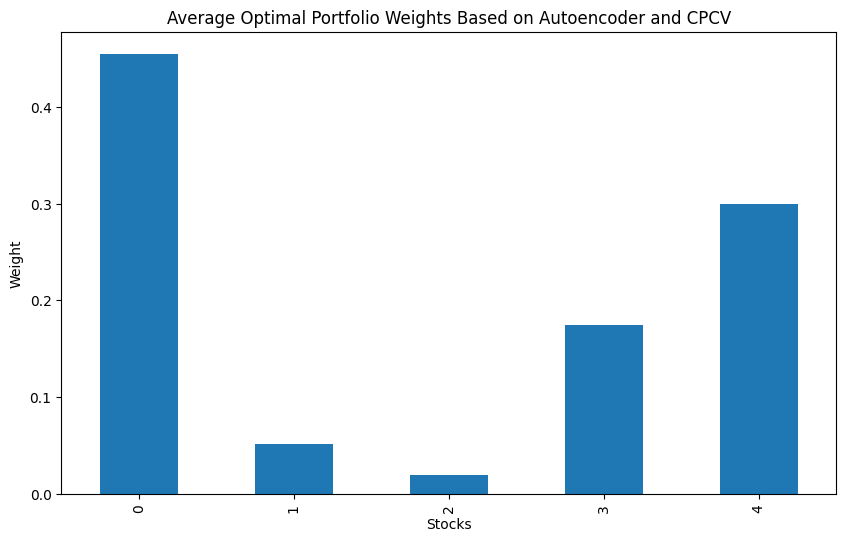

In [ ]:
# Set random seed for reproducibility
np.random.seed(seed_value)

# Function to build and train the autoencoder
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='linear')(encoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder

# Function to denoise the data using the trained autoencoder
def denoise_data(data, autoencoder):
    return autoencoder.predict(data)

# Function to calculate Kelly Criterion for continuous outcomes
def kelly_criterion_continuous(returns, risk_free_rate):
    mean_return = returns.mean()
    variance_return = returns.var()
    kelly_fraction = max((mean_return - risk_free_rate) / variance_return, 0)  # No negative Kelly fractions
    return kelly_fraction

# Function to perform Combinatorial Purged Cross-Validation
def combinatorial_purged_cross_validation(returns, num_splits):
    tscv = TimeSeriesSplit(n_splits=num_splits)

    optimal_weights_list = []

    for train_index, test_index in tscv.split(returns.index):
        train_returns = returns.iloc[train_index]
        test_returns = returns.iloc[test_index]

        # Calculate the Kelly fraction for each stock in the training set
        kelly_fractions = train_returns.apply(kelly_criterion_continuous, risk_free_rate=daily_risk_free_rate)

        # Normalize the Kelly fractions to get portfolio weights
        portfolio_weights = kelly_fractions / kelly_fractions.sum()

        # Save optimal weights for each fold
        optimal_weights_list.append(portfolio_weights)

    return optimal_weights_list

# Define tickers and time period for the historical data
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']
start_date = '2023-01-01'
end_date = '2023-07-01'

# Download historical stock data
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Calculate daily log returns
returns = np.log(data).diff().dropna()

# Function to add noise to the data
def add_noise(data, noise_factor=0.01):
    return data + np.random.normal(loc=0, scale=noise_factor, size=data.shape)

# Add noise to the returns for denoising autoencoder
noisy_returns = add_noise(returns)

# Standardize the data
scaler = StandardScaler()
noisy_returns_scaled = scaler.fit_transform(noisy_returns)

# Split data into training and testing sets
train_data, test_data, train_returns, test_returns = train_test_split(
    noisy_returns_scaled, returns.values, test_size=0.2, random_state=seed_value
)

# Build and train the autoencoder
autoencoder = build_autoencoder(train_data.shape[1])
autoencoder.fit(train_data, train_data, epochs=50, batch_size=256, shuffle=True, validation_data=(test_data, test_data))

# Denoise the returns using the trained autoencoder
denoised_returns = denoise_data(noisy_returns_scaled, autoencoder)

# Convert denoised returns back to original scale
denoised_returns_original_scale = scaler.inverse_transform(denoised_returns)

# Perform Combinatorial Purged Cross-Validation for the denoised returns
num_splits = 5  # Number of splits for TimeSeriesSplit
optimal_weights_list = combinatorial_purged_cross_validation(pd.DataFrame(denoised_returns_original_scale, index=returns.index), num_splits)

# Average optimal weights over all folds
average_optimal_weights_merged = pd.DataFrame(optimal_weights_list).mean()

# Display the average optimal weights
print("\nAverage Optimal Weights:")
print(average_optimal_weights_merged)

# Plot the average optimal weights
average_optimal_weights_merged.plot(kind='bar', figsize=(10, 6))
plt.title('Average Optimal Portfolio Weights Based on Autoencoder and CPCV')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.show()

[*********************100%%**********************]  5 of 5 completed


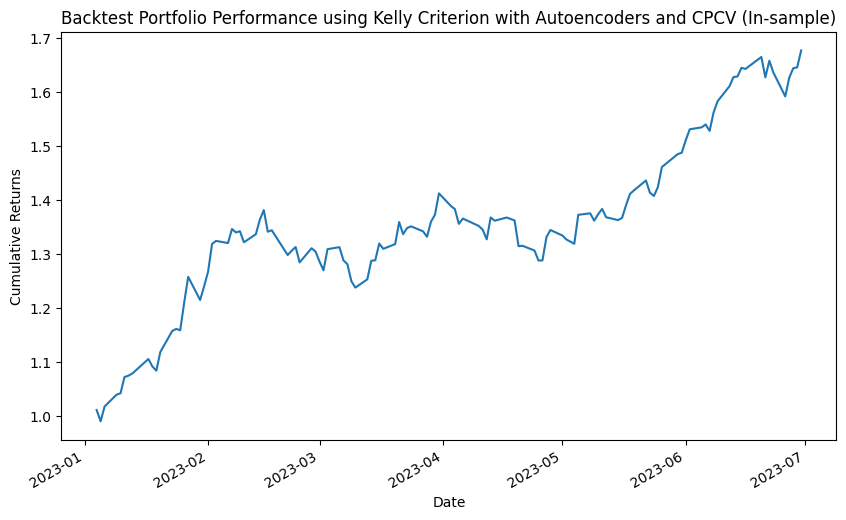


Cumulative Return (Autoencoders + CPCV): 67.76%
Mean Daily Return (Autoencoders + CPCV): 0.4358%
Volatility (Standard Deviation of Cumulative Returns) (Autoencoders + CPCV): 15.2000%
Volatility (Standard Deviation of Daily Returns) (Autoencoders + CPCV): 1.6942%
Sharpe Ratio (Autoencoders + CPCV): 4.458


In [ ]:
# Backtest period
start_date_backtest = '2023-01-01'
end_date_backtest = '2023-07-01'
np.random.seed(1)

# Download data for the backtest period
data_backtest = yf.download(tickers, start=start_date_backtest, end=end_date_backtest, interval='1d')['Adj Close']

# Calculate daily log returns for the backtest period
returns_backtest = np.log(data_backtest).diff().dropna()

# Calculate portfolio performance using denoised returns
daily_portfolio_returns_merged = (returns_backtest.values * average_optimal_weights_merged.values).sum(axis=1)
# Adjust daily returns by subtracting the daily risk-free rate
adjusted_daily_returns_merged = daily_portfolio_returns_merged - daily_risk_free_rate
cumulative_returns_merged = (1 + adjusted_daily_returns_merged).cumprod()

# Convert cumulative returns to a Pandas Series
cumulative_returns_merged = pd.Series(cumulative_returns_merged, index=returns_backtest.index)

# Plot the cumulative returns
cumulative_returns_merged.plot(figsize=(10, 6))
plt.title('Backtest Portfolio Performance using Kelly Criterion with Autoencoders and CPCV (In-sample)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Output the performance statistics
print(f"\nCumulative Return (Autoencoders + CPCV): {cumulative_returns_merged.iloc[-1] - 1:.2%}")
print(f"Mean Daily Return (Autoencoders + CPCV): {adjusted_daily_returns_merged.mean():.4%}")
print(f"Volatility (Standard Deviation of Cumulative Returns) (Autoencoders + CPCV): {cumulative_returns_merged.std():.4%}")
print(f"Volatility (Standard Deviation of Daily Returns) (Autoencoders + CPCV): {adjusted_daily_returns_merged.std():.4%}")
print(f"Sharpe Ratio (Autoencoders + CPCV): {(cumulative_returns_merged.iloc[-1]-1)/(cumulative_returns_merged.std()):.4}")

From the results, we can observe that the portfolio return has significantly increased when we use both autoencoders and CPCV techniques. However, the portfolio volatility has also been significantly increased, and the proportion is large compared to the increase in portfolio return. As a result, this portfolio has the second highest Sharpe ratio among all four portfolios.

# Step 4: Out-of-Sample Performance

In this section, we will evaluate the performance of each portfolio by using out-of-sample dataset, i.e., between 2023/7/2 and 2023/7/16. The implementation and results are shown below.

## Original Kelly Portfolio

[*********************100%%**********************]  5 of 5 completed


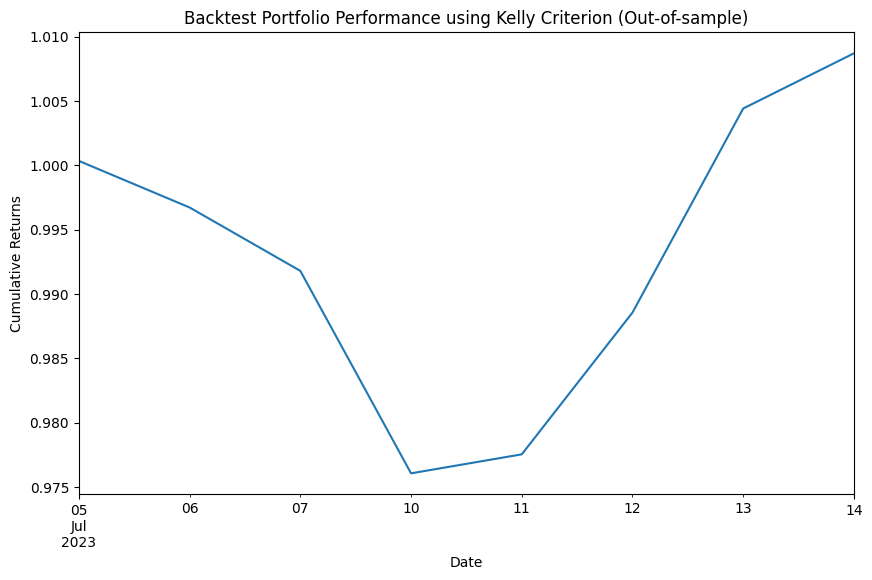

Cumulative Return: 0.87%
Mean Daily Return: 0.1127%
Volatility (Standard Deviation of Cumulative Returns): 1.1905%
Volatility (Standard Deviation of Daily Returns): 0.9886%
Sharpe Ratio: 0.7317


In [ ]:
# Testing period
start_date_backtest = '2023-07-02'
end_date_backtest = '2023-07-16'
np.random.seed(seed_value)

# Download data for the backtest period
data_backtest = yf.download(tickers, start=start_date_backtest, end=end_date_backtest, interval='1d')['Adj Close']

# Calculate daily log returns for the backtest period
returns_backtest = np.log(data_backtest).diff().dropna()

# Calculate portfolio performance
daily_portfolio_returns = (returns_backtest * portfolio_weights).sum(axis=1)
# Adjust daily returns by subtracting the daily risk-free rate
adjusted_daily_returns = daily_portfolio_returns - daily_risk_free_rate
cumulative_returns = (1 + adjusted_daily_returns).cumprod()

# Plot the cumulative returns
cumulative_returns.plot(figsize=(10, 6))
plt.title('Backtest Portfolio Performance using Kelly Criterion (Out-of-sample)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Output the performance statistics
print(f"Cumulative Return: {cumulative_returns.iloc[-1] - 1:.2%}")
print(f"Mean Daily Return: {adjusted_daily_returns.mean():.4%}")
print(f"Volatility (Standard Deviation of Cumulative Returns): {cumulative_returns.std():.4%}")
print(f"Volatility (Standard Deviation of Daily Returns): {adjusted_daily_returns.std():.4%}")
print(f"Sharpe Ratio: {(cumulative_returns.iloc[-1]-1)/(cumulative_returns.std()):.4}")

## Kelly Portfolio with Denoising Technique

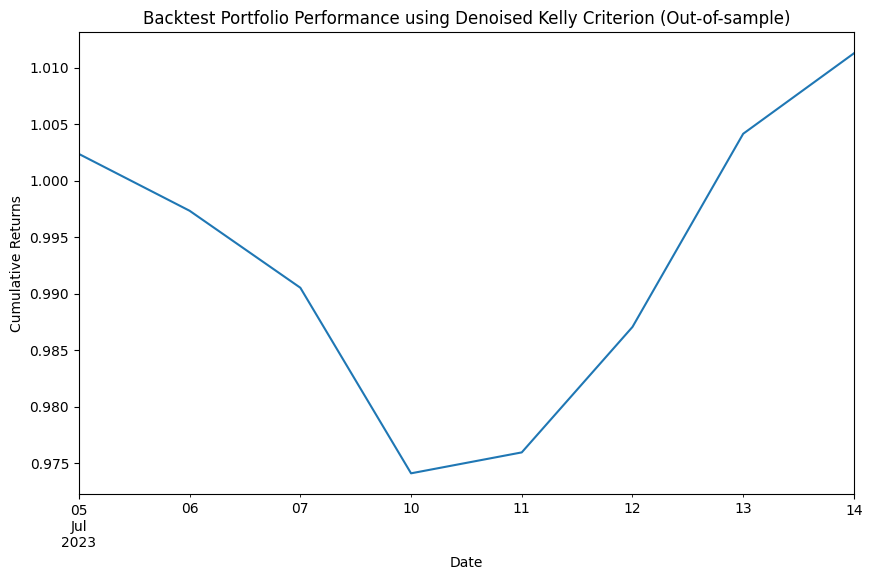


Cumulative Return (Denoised): 1.13%
Mean Daily Return (Denoised): 0.1452%
Volatility (Standard Deviation of Cumulative Returns) (Denoised): 1.3375%
Volatility (Standard Deviation of Daily Returns) (Denoised): 1.0110%
Sharpe Ratio (Denoised): 0.8422


In [ ]:
# Calculate portfolio performance using denoised returns
daily_portfolio_returns_denoised = (returns_backtest.values * portfolio_weights_denoised.values).sum(axis=1)
# Adjust daily returns by subtracting the daily risk-free rate
adjusted_daily_returns_denoised = daily_portfolio_returns_denoised - daily_risk_free_rate
cumulative_returns_denoised = (1 + adjusted_daily_returns_denoised).cumprod()
np.random.seed(seed_value)

# Convert cumulative returns to a Pandas Series
cumulative_returns_denoised = pd.Series(cumulative_returns_denoised, index=returns_backtest.index)

# Plot the cumulative returns
cumulative_returns_denoised.plot(figsize=(10, 6))
plt.title('Backtest Portfolio Performance using Denoised Kelly Criterion (Out-of-sample)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Output the performance statistics
print(f"\nCumulative Return (Denoised): {cumulative_returns_denoised.iloc[-1] - 1:.2%}")
print(f"Mean Daily Return (Denoised): {adjusted_daily_returns_denoised.mean():.4%}")
print(f"Volatility (Standard Deviation of Cumulative Returns) (Denoised): {cumulative_returns_denoised.std():.4%}")
print(f"Volatility (Standard Deviation of Daily Returns) (Denoised): {adjusted_daily_returns_denoised.std():.4%}")
print(f"Sharpe Ratio (Denoised): {(cumulative_returns_denoised.iloc[-1]-1)/(cumulative_returns_denoised.std()):.4}")

## Kelly Portfolio with CPCV Technique

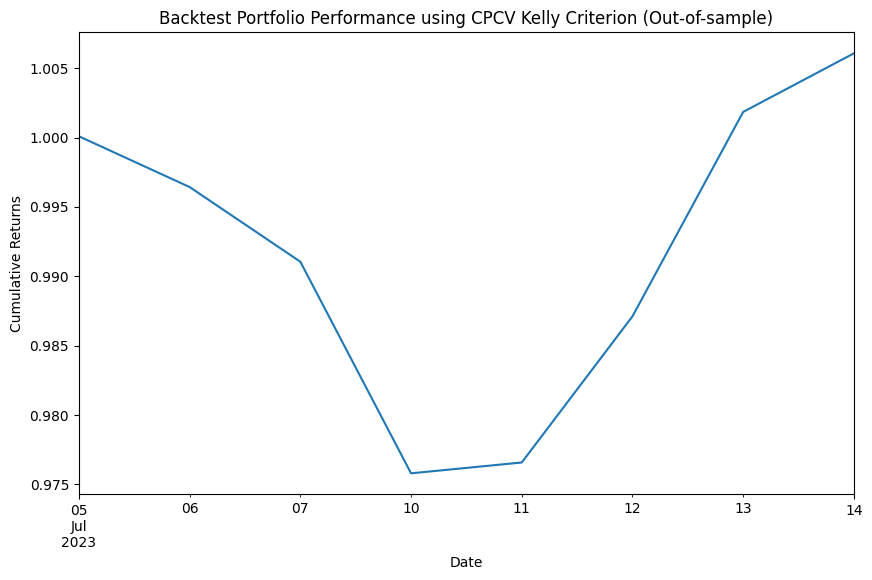


Cumulative Return (CPCV): 0.61%
Mean Daily Return (CPCV): 0.0796%
Volatility (Standard Deviation of Cumulative Returns) (CPCV): 1.1370%
Volatility (Standard Deviation of Daily Returns) (CPCV): 0.8887%
Sharpe Ratio (CPCV): 0.5338


In [ ]:
# Calculate portfolio performance using denoised returns
daily_portfolio_returns_cpcv = (returns_backtest.values * average_optimal_weights.values).sum(axis=1)
# Adjust daily returns by subtracting the daily risk-free rate
adjusted_daily_returns_cpcv = daily_portfolio_returns_cpcv - daily_risk_free_rate
cumulative_returns_cpcv = (1 + adjusted_daily_returns_cpcv).cumprod()
np.random.seed(seed_value)

# Convert cumulative returns to a Pandas Series
cumulative_returns_cpcv = pd.Series(cumulative_returns_cpcv, index=returns_backtest.index)

# Plot the cumulative returns
cumulative_returns_cpcv.plot(figsize=(10, 6))
plt.title('Backtest Portfolio Performance using CPCV Kelly Criterion (Out-of-sample)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Output the performance statistics
print(f"\nCumulative Return (CPCV): {cumulative_returns_cpcv.iloc[-1] - 1:.2%}")
print(f"Mean Daily Return (CPCV): {adjusted_daily_returns_cpcv.mean():.4%}")
print(f"Volatility (Standard Deviation of Cumulative Returns) (CPCV): {cumulative_returns_cpcv.std():.4%}")
print(f"Volatility (Standard Deviation of Daily Returns) (CPCV): {adjusted_daily_returns_cpcv.std():.4%}")
print(f"Sharpe Ratio (CPCV): {(cumulative_returns_cpcv.iloc[-1]-1)/(cumulative_returns_cpcv.std()):.4}")

## Kelly Portfolio with Denoising and CPCV Technique

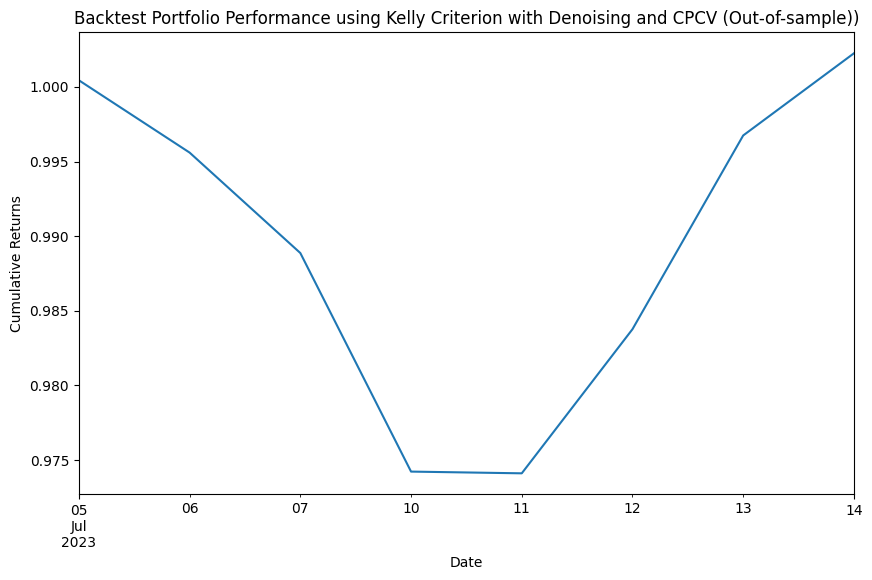


Cumulative Return (Denoising + CPCV): 0.23%
Mean Daily Return (Denoising + CPCV): 0.0318%
Volatility (Standard Deviation of Cumulative Returns) (Denoising + CPCV): 1.1182%
Volatility (Standard Deviation of Daily Returns) (Denoising + CPCV): 0.8592%
Sharpe Ratio (Denoising + CPCV): 0.2014


In [ ]:
# Calculate portfolio performance using denoised returns
daily_portfolio_returns_merged = (returns_backtest.values * average_optimal_weights_merged.values).sum(axis=1)
# Adjust daily returns by subtracting the daily risk-free rate
adjusted_daily_returns_merged = daily_portfolio_returns_merged - daily_risk_free_rate
cumulative_returns_merged = (1 + adjusted_daily_returns_merged).cumprod()
np.random.seed(seed_value)

# Convert cumulative returns to a Pandas Series
cumulative_returns_merged = pd.Series(cumulative_returns_merged, index=returns_backtest.index)

# Plot the cumulative returns
cumulative_returns_merged.plot(figsize=(10, 6))
plt.title('Backtest Portfolio Performance using Kelly Criterion with Denoising and CPCV (Out-of-sample))')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Output the performance statistics
print(f"\nCumulative Return (Denoising + CPCV): {cumulative_returns_merged.iloc[-1] - 1:.2%}")
print(f"Mean Daily Return (Denoising + CPCV): {adjusted_daily_returns_merged.mean():.4%}")
print(f"Volatility (Standard Deviation of Cumulative Returns) (Denoising + CPCV): {cumulative_returns_merged.std():.4%}")
print(f"Volatility (Standard Deviation of Daily Returns) (Denoising + CPCV): {adjusted_daily_returns_merged.std():.4%}")
print(f"Sharpe Ratio (Denoising + CPCV): {(cumulative_returns_merged.iloc[-1]-1)/(cumulative_returns_merged.std()):.4}")

# Step 5: Performance Evaluation and Conclusion

## Step 5.1: Differences in Performance

### In-sample Results Summary

**Original Kelly Portfolio**

- Cumulative Return: 53.25%
- Volatility (Standard Deviation of Cumulative Returns): 12.9647%
- Sharpe Ratio: 4.107

**Kelly Portfolio with Denoising Technique (Autoencoders)**

- Cumulative Return (Denoised): 64.99%
- Volatility (Standard Deviation of Cumulative Returns) (Denoised): 15.4967%
- Sharpe Ratio (Denoised): 4.194

**Kelly Portfolio with Backtesting Technique (Combinatorial Purged Cross-Validation)**

- Cumulative Return (CPCV): 55.73%
- Volatility (Standard Deviation of Cumulative Returns) (CPCV): 13.1911%
- Sharpe Ratio (CPCV): 4.225

**Kelly Portfolio with Denoising and Backtesting Technique (Autoencoders + CPCV)**

- Cumulative Return (Autoencoders + CPCV): 67.76%
- Volatility (Standard Deviation of Cumulative Returns) (Autoencoders + CPCV): 15.2000%
- Sharpe Ratio (Autoencoders + CPCV): 4.458


From the results, we can conclude the findings as follows:
- By using a single denoising technique, the portfolio's return has been increased significantly. However, the volatility is also higher, which makes no much change in Sharpe ratio.
- By using a single backtesting improvement (CPCV technique), the portfolio's return and Sharpe ratio are increased. Although the increase in portfolio's return is less than the Kelly portfolio with a single denoising technique, the portfolio's Sharpe ratio is higher since the volatility has not been increased much.
- By using autoencoders and CPCV technique with the Kelly portfolio (Multiple improvements), the portfolio's return and Sharpe ratio are increased significantly. This portfolio achieves the highest portfolio's return and Sharpe ratio.

### Out-of-sample Results Summary (2 weeks)

**Original Kelly Portfolio**

- Cumulative Return: 0.87%
- Volatility (Standard Deviation of Cumulative Returns): 1.1905%
- Sharpe Ratio: 0.7317

**Kelly Portfolio with Denoising Technique (Autoencoders)**

- Cumulative Return (Denoised): 1.13%
- Volatility (Standard Deviation of Cumulative Returns) (Denoised): 1.3375%
- Sharpe Ratio (Denoised): 0.8422

**Kelly Portfolio with Backtesting Technique (Combinatorial Purged Cross-Validation)**

- Cumulative Return (CPCV): 0.61%
- Volatility (Standard Deviation of Cumulative Returns) (CPCV): 1.1370%
- Sharpe Ratio (CPCV): 0.5338

**Kelly Portfolio with Denoising and Backtesting Technique (Autoencoders + CPCV)**

- Cumulative Return (Denoising + CPCV): 0.23%
- Volatility (Standard Deviation of Cumulative Returns) (Denoising + CPCV): 1.1182%
- Sharpe Ratio (Denoising + CPCV): 0.2014

According to the out-of-sample backtesting results, we can observe that:
- By using a single denoising, the portfolio has got higher cumulative return and Sharpe ratio compared to the original portfolio without any improvement. Although the volatility has also increased, but the proportion of increased portfolio return is larger.
- By using a single backtesting improvement (CPCV technique), we have got the second lowest portfolio's volatility. However, the cumulative return and Sharpe ratio have also been significantly dropped.
- By using autoencoders and CPCV technique with the Kelly portfolio (Multiple improvements), we have achieved the lowest portfolio cumulative return and Sharpe ratio among all portfolios. But this portfolio has the minimum volatility.

These results imply that using a single denoising technique can help enhancing the performance of the portfolio significantly.

## Step 5.2: Reasons of the Differences

**Denoising Technique (Autoencoders)**

Autoencoders can be used to filter out the noise and irrelevant information from the data. However, it can also remove some relevant information, which leads to unsatisfactory performance. We can observe that autoencoders remove some irrelevant information very well during the in-sample and out-of-sample backtesting.

**Backtesting Technique (CPCV)**

CPCV helps in addressing the overfitting problem. However, it assumes that the future market condition will be similar to the past, in which it might not always be true. Therefore, from the results, we can observe that the in-sample performance is very good, but the out-of-sample performance is the worst.

**Combined Approach (Denoising + CPCV)**

The combined techniques could enhance the strengths of both. However, the CPCV technique dragged down the performance significantly. Also, it also introduces complexity.

Therefore, the portfolio with a single denoising technique is the best. Note that the chosen techniques may perform differently under different market conditions. Also, the choice of hyperparameters, the architecture of the models, and the training process can impact their effectiveness.

## Step 5.3: Justification of the Improvements' Complexity

The incremental gain might justify the added complexity when the performance is increased significantly, the risks are reduced significantly, or the improvements align with the specific investment objectives. From the results, we can observe that the denoising approach has achieve a significant increase in portfolio performance, i.e., portfolio's return and Sharpe ratio. Thus, the incremental gain justifies the added complexity in this situation.

# References

WorldQuant. *Better Backtesting and Reinforcement Learning - Portfolio Management Module*.